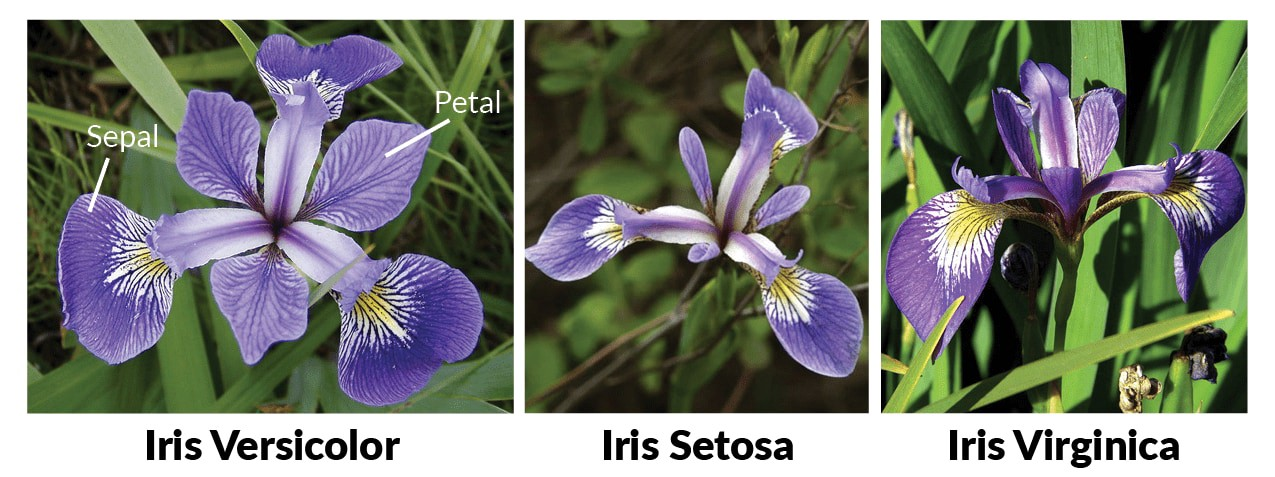

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
type(iris)

sklearn.utils.Bunch

In [3]:
df=iris.frame
type(df)

pandas.core.frame.DataFrame

In [4]:
#iris.feature_names
#df = pd.DataFrame(iris.data,columns=iris.feature_names)

In [5]:
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [7]:
df['species'] = df['target'].replace(to_replace=[0,1,2], value=['Iris-setosa','Iris Versicolour','Iris Virginica'])
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target      species  
0       0  Iris-setosa  
1       0  Iris-setosa  
2       0  Iris-setosa  
3       0  Iris-setosa  
4       0  Iris-setosa

In [8]:
df['species'].value_counts()

Iris-setosa         50
Iris Versicolour    50
Iris Virginica      50
Name: species, dtype: int64

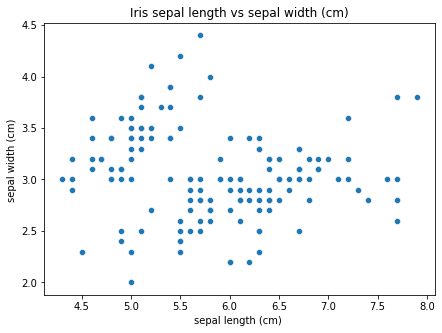

In [9]:
plt.figure(figsize=(7,5))
g=sns.scatterplot(data=df, x="sepal length (cm)", y="sepal width (cm)")
g.set(xlabel ="sepal length (cm) ", ylabel = "sepal width (cm) ", title ='Iris sepal length vs sepal width (cm)')

#plt.xlabel("sepal length (cm) ",fontsize=13)
#plt.ylabel("sepal width (cm) ", fontsize=13)
#plt.title('Iris sepal length vs sepal width (cm)', fontsize=17)
plt.show()

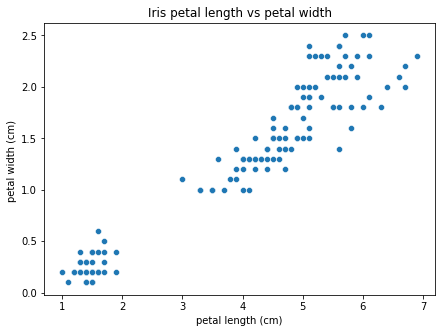

In [10]:
plt.figure(figsize=(7,5))
g=sns.scatterplot(data=df, x="petal length (cm)", y="petal width (cm)")
g.set(xlabel ="petal length (cm)", ylabel = "petal width (cm) ", title ='Iris petal length vs petal width')

plt.show()

iris_setosa=df.loc[df["species"]=="Iris-setosa"]
iris_virginica=df.loc[df["species"]=="Iris-virginica"]
iris_versicolor=df.loc[df["species"]=="Iris-versicolor"]

### Distribution plots

#### plot each flower to a histogram

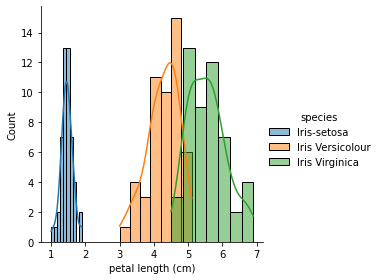

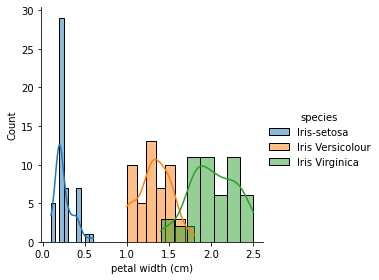

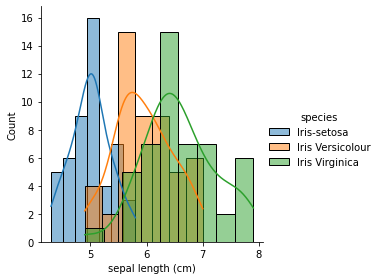

In [11]:
#fig, ax = plt.subplots(figsize=(10, 8))
g=sns.FacetGrid(df, hue="species", height=4)
g.map(sns.histplot,"petal length (cm)", kde=True).add_legend()
h=sns.FacetGrid(df, hue="species", height=4)
h.map(sns.histplot,"petal width (cm)", kde=True).add_legend()
i=sns.FacetGrid(df, hue="species", height=4)
i.map(sns.histplot,"sepal length (cm)", kde=True).add_legend()

plt.show()

# Boxplot

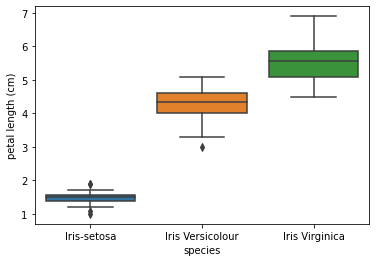

In [12]:
sns.boxplot(x="species",y="petal length (cm)",data=df)
plt.show()

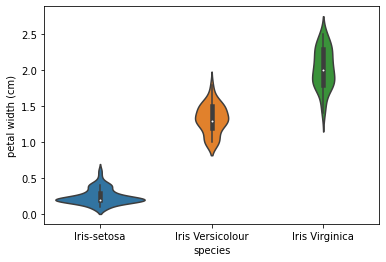

In [13]:
sns.violinplot(x="species",y="petal width (cm)",data=df)
plt.show()

## Correlation

In [14]:
df.corr()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   
target                      0.782561         -0.426658           0.949035   

                   petal width (cm)    target  
sepal length (cm)          0.817941  0.782561  
sepal width (cm)          -0.366126 -0.426658  
petal length (cm)          0.962865  0.949035  
petal width (cm)           1.000000  0.956547  
target                     0.956547  1.000000

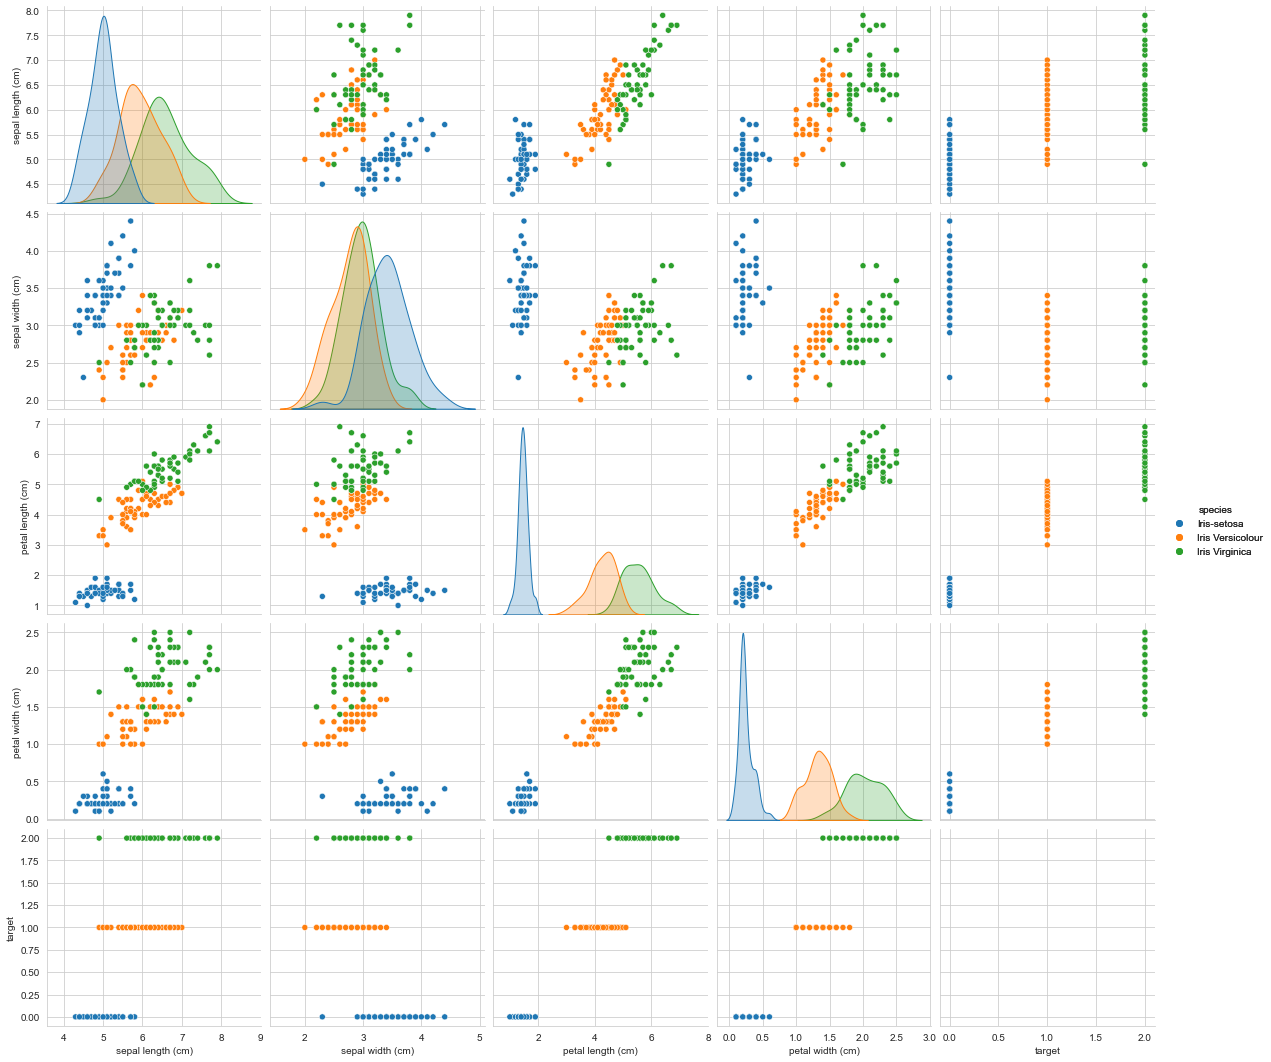

In [15]:
sns.set_style("whitegrid")
sns.pairplot(df, hue="species", height=3).add_legend()
plt.show()

In [16]:
x=df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]

# 1. Let's consider all the features 

In [17]:
input=df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
input.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

## Find optimum number of cluster

In [18]:
from sklearn.cluster import KMeans
sse = [] #SUM OF SQUARED ERROR
for k in range(1,11):
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(input)
    sse.append(km.inertia_)
sse

[681.3706,
 152.3479517603579,
 78.85144142614601,
 57.22847321428571,
 46.44618205128205,
 39.03998724608725,
 34.723277629233515,
 30.06311061745273,
 28.08941131237184,
 25.967077979038507]

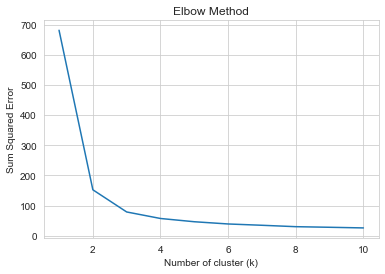

In [19]:
sns.set_style("whitegrid")
g=sns.lineplot(x=range(1,11), y=sse)

g.set(xlabel ="Number of cluster (k)", ylabel = "Sum Squared Error", title ='Elbow Method')

plt.show()

In [20]:
kmeans = KMeans(n_clusters = 3, random_state = 2)
pred = kmeans.fit_predict(input)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [21]:
df['pred']=pred
df.head(3)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   

   target      species  pred  
0       0  Iris-setosa     0  
1       0  Iris-setosa     0  
2       0  Iris-setosa     0

In [22]:
df[df.pred==0].head(3)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   

   target      species  pred  
0       0  Iris-setosa     0  
1       0  Iris-setosa     0  
2       0  Iris-setosa     0

In [23]:
df[df.pred==1].tail(3)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
142                5.8               2.7                5.1               1.9   
146                6.3               2.5                5.0               1.9   
149                5.9               3.0                5.1               1.8   

     target         species  pred  
142       2  Iris Virginica     1  
146       2  Iris Virginica     1  
149       2  Iris Virginica     1

In [24]:
df[df.pred==2].tail(3)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
145                6.7               3.0                5.2               2.3   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   

     target         species  pred  
145       2  Iris Virginica     2  
147       2  Iris Virginica     2  
148       2  Iris Virginica     2

In [25]:
df.groupby(['target','pred']).count()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
target pred                                                           
0      0                    50                50                 50   
1      1                    48                48                 48   
       2                     2                 2                  2   
2      1                    14                14                 14   
       2                    36                36                 36   

             petal width (cm)  species  
target pred                             
0      0                   50       50  
1      1                   48       48  
       2                    2        2  
2      1                   14       14  
       2                   36       36

In [26]:
df['pred_species'] = df['pred'].replace(to_replace=[0,1,2], value=['Iris-setosa','Iris Versicolour','Iris Virginica'])

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(df.species, df.pred_species, normalize=True)

0.8933333333333333

## Accuracy = 89.33%

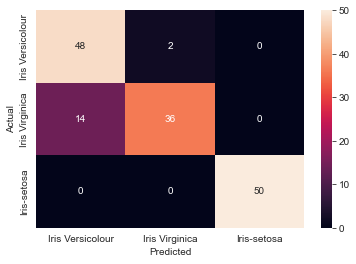

In [28]:
confusion_matrix = pd.crosstab(df['species'], df['pred_species'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [29]:
kmeans.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

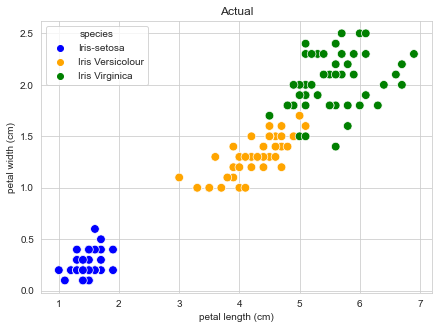

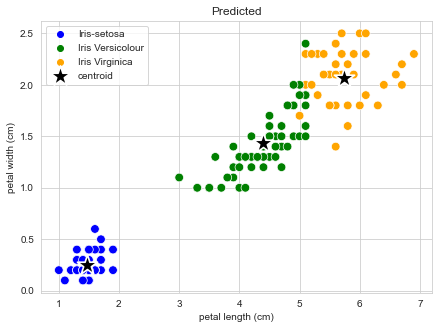

In [30]:
#Actual
plt.figure(figsize=(7,5))
color=['blue','orange','green']
g=sns.scatterplot(data=df, x="petal length (cm)", y="petal width (cm)", hue='species', palette=color, s=75)
g.set(title ='Actual')

plt.show()

#Predicted
plt.figure(figsize=(7,5))
color=['blue','green','orange']
h=sns.scatterplot(data=df, x="petal length (cm)", y="petal width (cm)", hue='pred_species', palette=color, s=75)
sns.scatterplot(x=kmeans.cluster_centers_[:,2],y=kmeans.cluster_centers_[:,3],
                s=450, color='black',marker='*',label='centroid')
h.set(title ='Predicted')
plt.show()

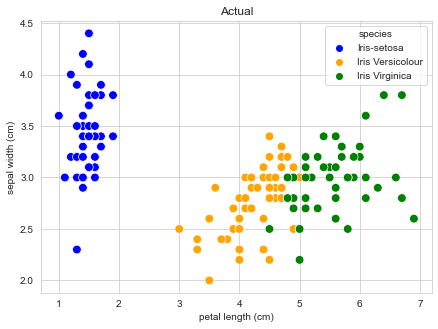

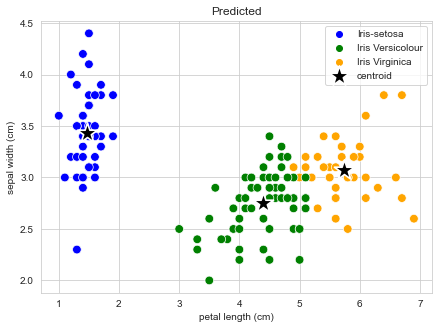

In [31]:
#Actual
plt.figure(figsize=(7,5))
color=['blue','orange','green']
g=sns.scatterplot(data=df,  x="petal length (cm)",y="sepal width (cm)",  hue='species', palette=color, s=75)
g.set(title ='Actual')

plt.show()

#Predicted
plt.figure(figsize=(7,5))
color=['blue','green','orange']
h=sns.scatterplot(data=df,  x="petal length (cm)",y="sepal width (cm)", hue='pred_species', palette=color, s=75)
sns.scatterplot(x=kmeans.cluster_centers_[:,2],y=kmeans.cluster_centers_[:,1],
                s=450, color='black',marker='*',label='centroid')
h.set(title ='Predicted')
plt.show()

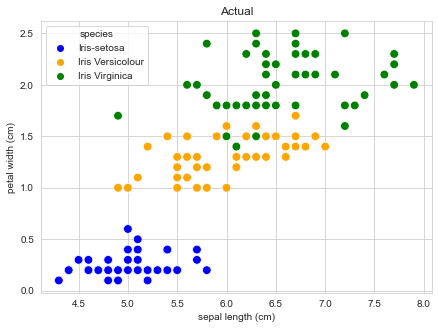

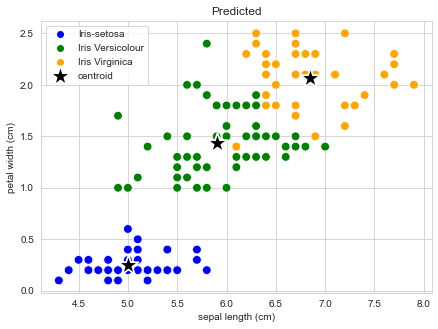

In [32]:
#Actual
plt.figure(figsize=(7,5))
color=['blue','orange','green']
g=sns.scatterplot(data=df, x="sepal length (cm)", y="petal width (cm)", hue='species', palette=color, s=75)
g.set( title ='Actual')

plt.show()

#Predicted
plt.figure(figsize=(7,5))
color=['blue','green','orange']
h=sns.scatterplot(data=df, x="sepal length (cm)", y="petal width (cm)", hue='pred_species', palette=color, s=75)
sns.scatterplot(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,3],
                s=450, color='black',marker='*',label='centroid')
h.set(title ='Predicted')
plt.show()

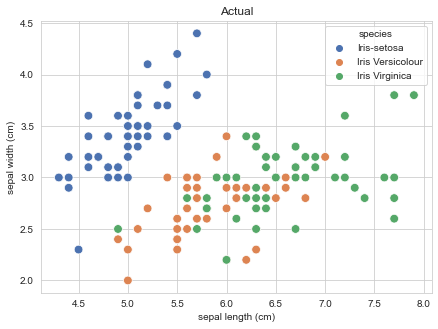

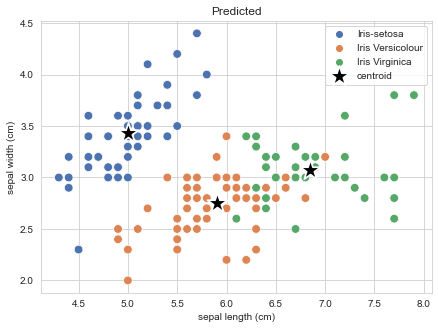

In [33]:
#Actual
plt.figure(figsize=(7,5))
g=sns.scatterplot(data=df, x="sepal length (cm)", y="sepal width (cm)", hue='species', palette='deep', s=75)

g.set(title ='Actual')

plt.show()


#Predicted
plt.figure(figsize=(7,5))
g=sns.scatterplot(data=df, x="sepal length (cm)", y="sepal width (cm)", hue='pred_species', palette='deep', s=75)
sns.scatterplot(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],
                s=450, color='black',marker='*',label='centroid')
g.set(title ='Predicted')

plt.show()

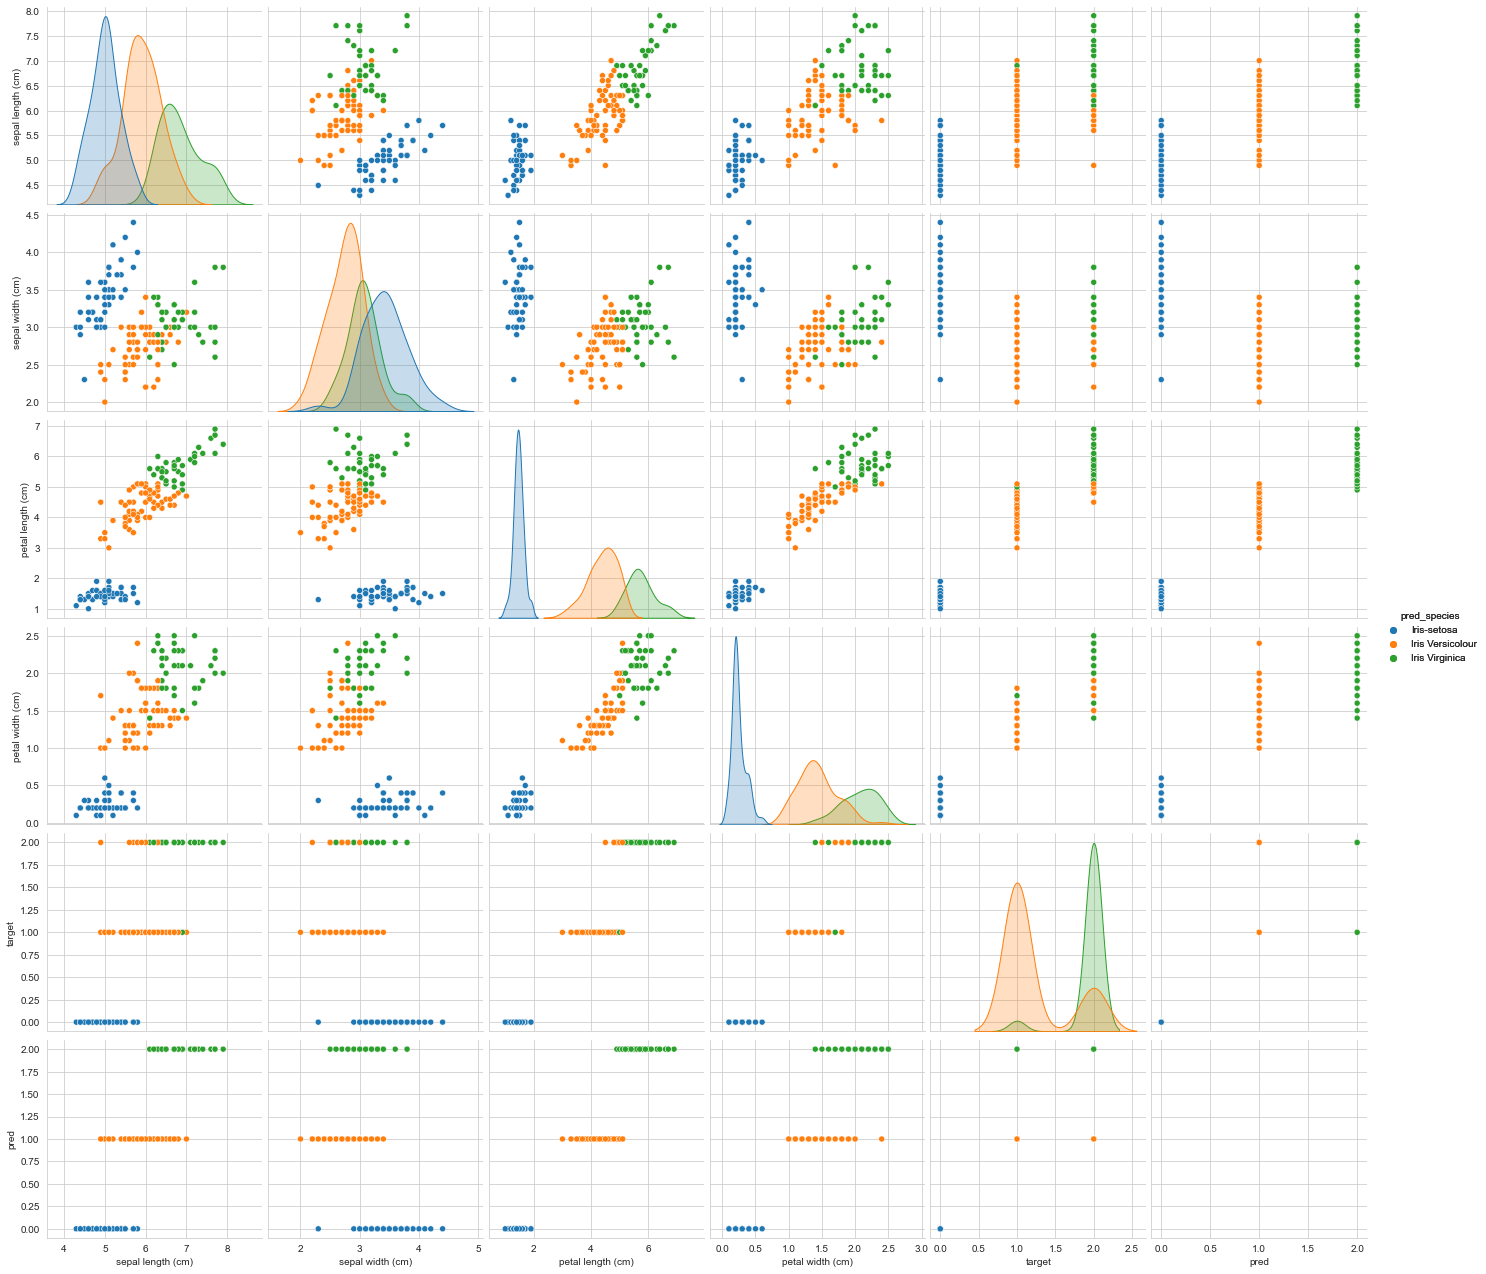

In [34]:
sns.set_style("whitegrid")
sns.pairplot(df, hue="pred_species", height=3).add_legend()

plt.show()

# 2. Let's consider only 'sepal length (cm)','petal length (cm)','petal width (cm)'

In [35]:
input=df[['sepal length (cm)','petal length (cm)','petal width (cm)']]
input.head()

sepal length (cm)  petal length (cm)  petal width (cm)
0                5.1                1.4               0.2
1                4.9                1.4               0.2
2                4.7                1.3               0.2
3                4.6                1.5               0.2
4                5.0                1.4               0.2

In [36]:
kmeans = KMeans(n_clusters = 3, random_state = 2)
pred = kmeans.fit_predict(input)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [37]:
df['pred']=pred

In [38]:
df.groupby(['target','pred']).count()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
target pred                                                           
0      0                    50                50                 50   
1      1                    48                48                 48   
       2                     2                 2                  2   
2      1                    14                14                 14   
       2                    36                36                 36   

             petal width (cm)  species  pred_species  
target pred                                           
0      0                   50       50            50  
1      1                   48       48            48  
       2                    2        2             2  
2      1                   14       14            14  
       2                   36       36            36

In [39]:
df['pred_species1'] = df['pred'].replace(to_replace=[0,1,2], 
                                               value=['Iris-setosa','Iris Versicolour','Iris Virginica'])

In [40]:
accuracy_score(df.species, df.pred_species1, normalize=True)

0.8933333333333333

## accuracy=89.33%

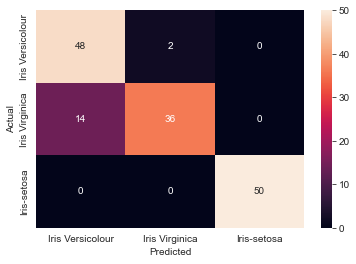

In [41]:
confusion_matrix = pd.crosstab(df['species'], df['pred_species1'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [42]:
kmeans.cluster_centers_

array([[5.006     , 1.462     , 0.246     ],
       [5.9016129 , 4.39354839, 1.43387097],
       [6.85      , 5.74210526, 2.07105263]])

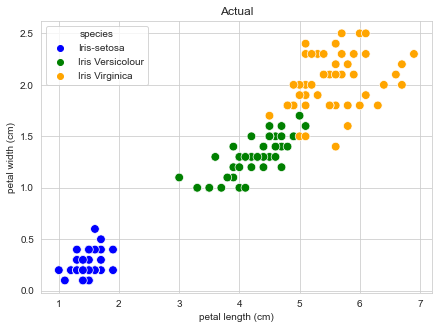

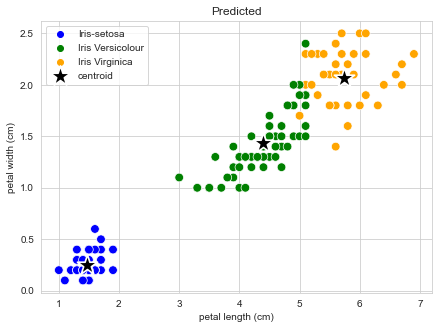

In [43]:
#Actual
plt.figure(figsize=(7,5))
#color=['blue','orange','green']
g=sns.scatterplot(data=df, x="petal length (cm)", y="petal width (cm)", hue='species', palette=color, s=75)
g.set(title ='Actual')

plt.show()

#Predicted
plt.figure(figsize=(7,5))
#color=['blue','green','orange']
h=sns.scatterplot(data=df, x="petal length (cm)", y="petal width (cm)", hue='pred_species1', palette=color, s=75)
sns.scatterplot(x=kmeans.cluster_centers_[:,1],y=kmeans.cluster_centers_[:,2],
                s=450, color='black',marker='*',label='centroid')
h.set(title ='Predicted')
plt.show()

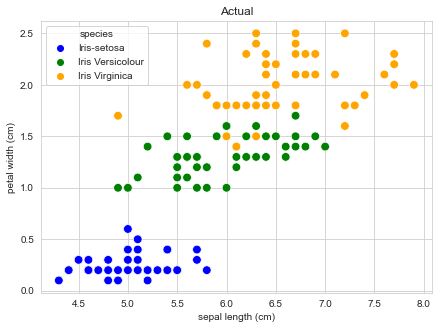

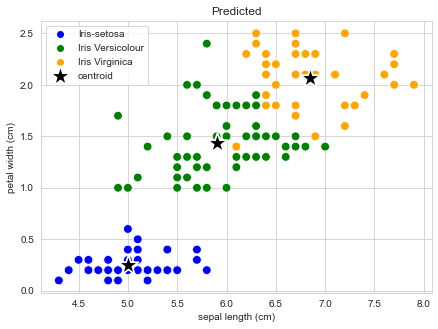

In [44]:
#Actual
plt.figure(figsize=(7,5))
#color=['blue','orange','green']
g=sns.scatterplot(data=df, x="sepal length (cm)", y="petal width (cm)", hue='species', palette=color, s=75)
g.set(title ='Actual')

plt.show()

#Predicted
plt.figure(figsize=(7,5))
#color=['blue','green','orange']
h=sns.scatterplot(data=df, x="sepal length (cm)", y="petal width (cm)", hue='pred_species1', palette=color, s=75)
sns.scatterplot(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,2],
                s=450, color='black',marker='*',label='centroid')
h.set(title ='Predicted')
plt.show()

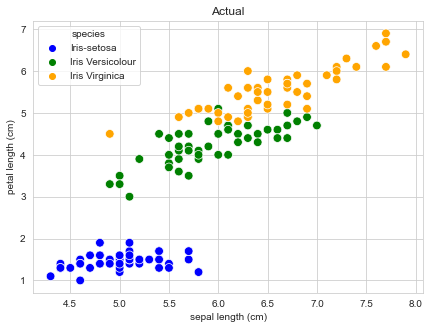

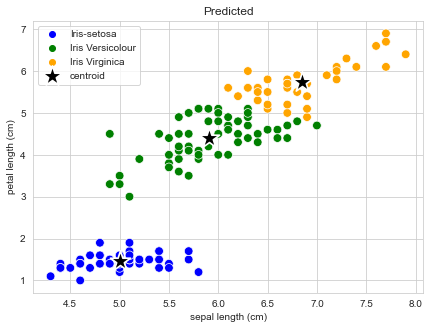

In [45]:
#Actual
plt.figure(figsize=(7,5))
#color=['blue','orange','green']
g=sns.scatterplot(data=df, x="sepal length (cm)", y="petal length (cm)", hue='species', palette=color, s=75)
g.set(title ='Actual')

plt.show()

#Predicted
plt.figure(figsize=(7,5))
#color=['blue','green','orange']
h=sns.scatterplot(data=df, x="sepal length (cm)", y="petal length (cm)", hue='pred_species1', palette=color, s=75)
sns.scatterplot(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],
                s=450, color='black',marker='*',label='centroid')
h.set(title ='Predicted')
plt.show()

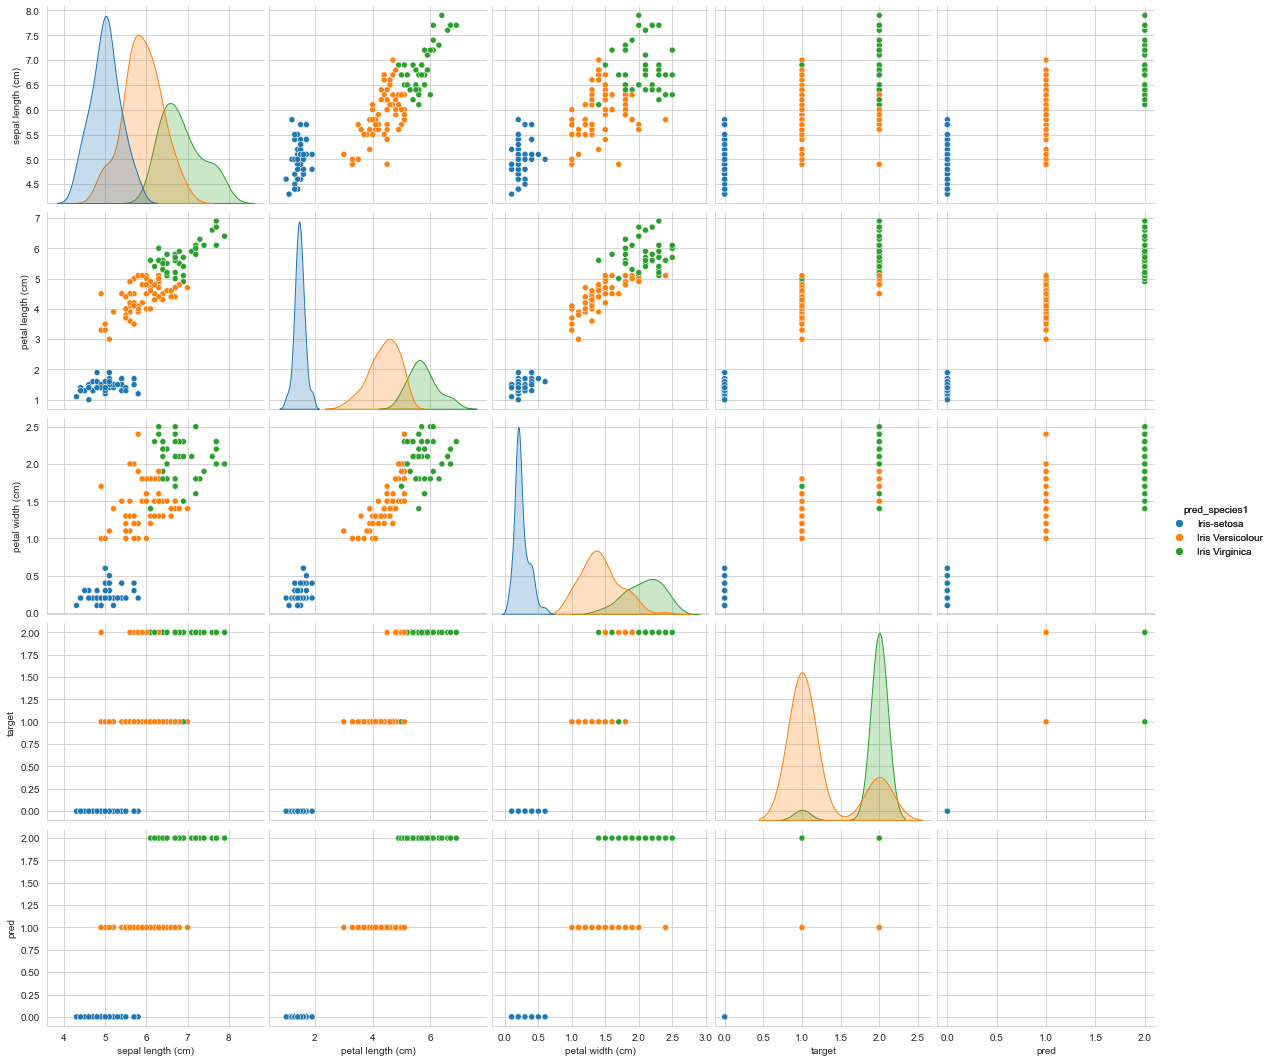

In [46]:
Target=df[['sepal length (cm)','petal length (cm)','petal width (cm)','target','species'
           ,'pred','pred_species1']]
sns.set_style("whitegrid")
sns.pairplot(Target, hue="pred_species1", height=3).add_legend()
plt.show()

# 3. Let's consider 'sepal width (cm)','petal length (cm)','petal width (cm)'

In [47]:
input=df[['sepal width (cm)','petal length (cm)','petal width (cm)',]]
input.head()

sepal width (cm)  petal length (cm)  petal width (cm)
0               3.5                1.4               0.2
1               3.0                1.4               0.2
2               3.2                1.3               0.2
3               3.1                1.5               0.2
4               3.6                1.4               0.2

In [48]:
kmeans = KMeans(n_clusters = 3, random_state = 2)
pred = kmeans.fit_predict(input)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [49]:
df['pred']=pred

In [50]:
df.groupby(['target','pred']).count()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
target pred                                                           
0      1                    50                50                 50   
1      0                    48                48                 48   
       2                     2                 2                  2   
2      0                     5                 5                  5   
       2                    45                45                 45   

             petal width (cm)  species  pred_species  pred_species1  
target pred                                                          
0      1                   50       50            50             50  
1      0                   48       48            48             48  
       2                    2        2             2              2  
2      0                    5        5             5              5  
       2                   45       45            45             45

In [51]:
df['pred_species2'] = df['pred'].replace(to_replace=[1,0,2], 
                                               value=['Iris-setosa','Iris Versicolour','Iris Virginica'])

In [52]:
accuracy_score(df.species, df.pred_species2, normalize=True)

0.9533333333333334

## accuracy=95.33%

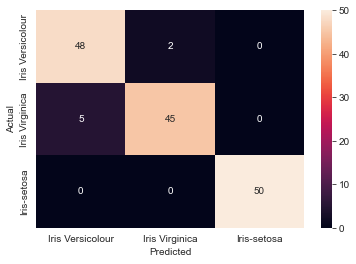

In [53]:
confusion_matrix = pd.crosstab(df['species'], df['pred_species2'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [54]:
kmeans.cluster_centers_

array([[2.75471698, 4.28113208, 1.3509434 ],
       [3.428     , 1.462     , 0.246     ],
       [3.00425532, 5.6106383 , 2.04255319]])

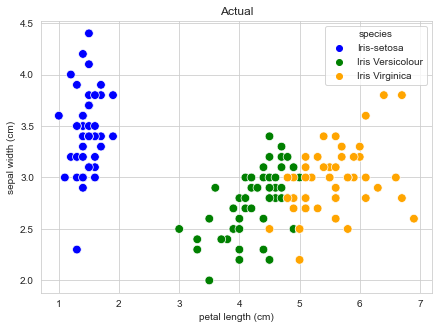

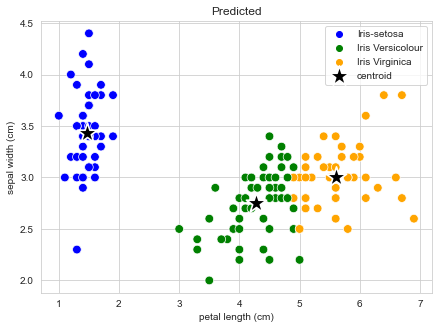

In [55]:
#Actual
plt.figure(figsize=(7,5))
#color=['blue','orange','green']
g=sns.scatterplot(data=df,  x="petal length (cm)", y="sepal width (cm)", hue='species', palette=color, s=75)
g.set(title ='Actual')

plt.show()

#Predicted
plt.figure(figsize=(7,5))
#color=['blue','green','orange']
h=sns.scatterplot(data=df, x="petal length (cm)", y="sepal width (cm)", hue='pred_species2', palette=color, s=75)
sns.scatterplot(x=kmeans.cluster_centers_[:,1],y=kmeans.cluster_centers_[:,0],
                s=450, color='black',marker='*',label='centroid')
h.set(title ='Predicted')
plt.show()

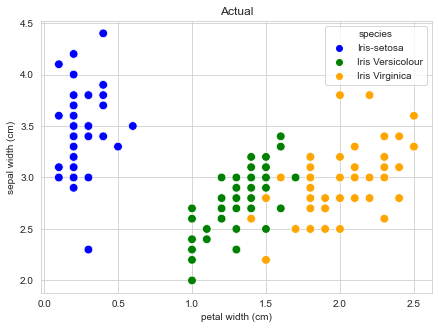

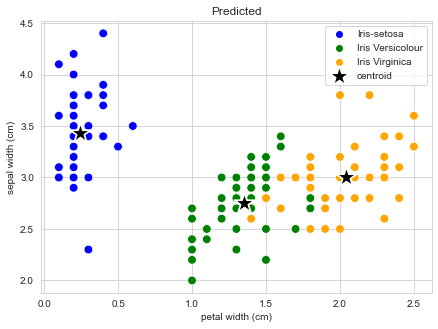

In [56]:
#Actual
plt.figure(figsize=(7,5))
#color=['blue','orange','green']
g=sns.scatterplot(data=df,  x="petal width (cm)", y="sepal width (cm)", hue='species', palette=color, s=75)
g.set(title ='Actual')

plt.show()

#Predicted
plt.figure(figsize=(7,5))
#color=['blue','green','orange']
h=sns.scatterplot(data=df, x="petal width (cm)", y="sepal width (cm)", hue='pred_species2', palette=color, s=75)
sns.scatterplot(x=kmeans.cluster_centers_[:,2],y=kmeans.cluster_centers_[:,0],
                s=450, color='black',marker='*',label='centroid')
h.set(title ='Predicted')
plt.show()

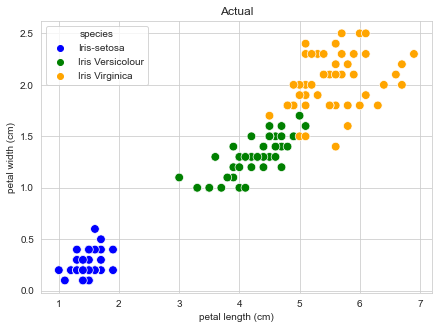

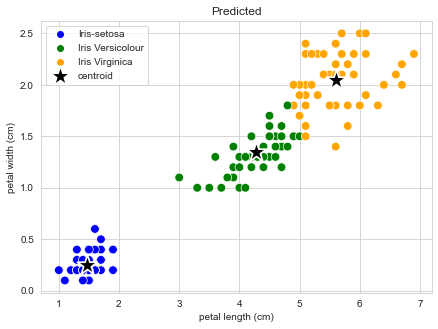

In [57]:
#Actual
plt.figure(figsize=(7,5))
#color=['blue','orange','green']
g=sns.scatterplot(data=df,  x="petal length (cm)", y="petal width (cm)", hue='species', palette=color, s=75)
g.set(title ='Actual')

plt.show()

#Predicted
plt.figure(figsize=(7,5))
#color=['blue','green','orange']
h=sns.scatterplot(data=df, x="petal length (cm)", y="petal width (cm)", hue='pred_species2', palette=color, s=75)
sns.scatterplot(x=kmeans.cluster_centers_[:,1],y=kmeans.cluster_centers_[:,2],
                s=450, color='black',marker='*',label='centroid')
h.set(title ='Predicted')
plt.show()

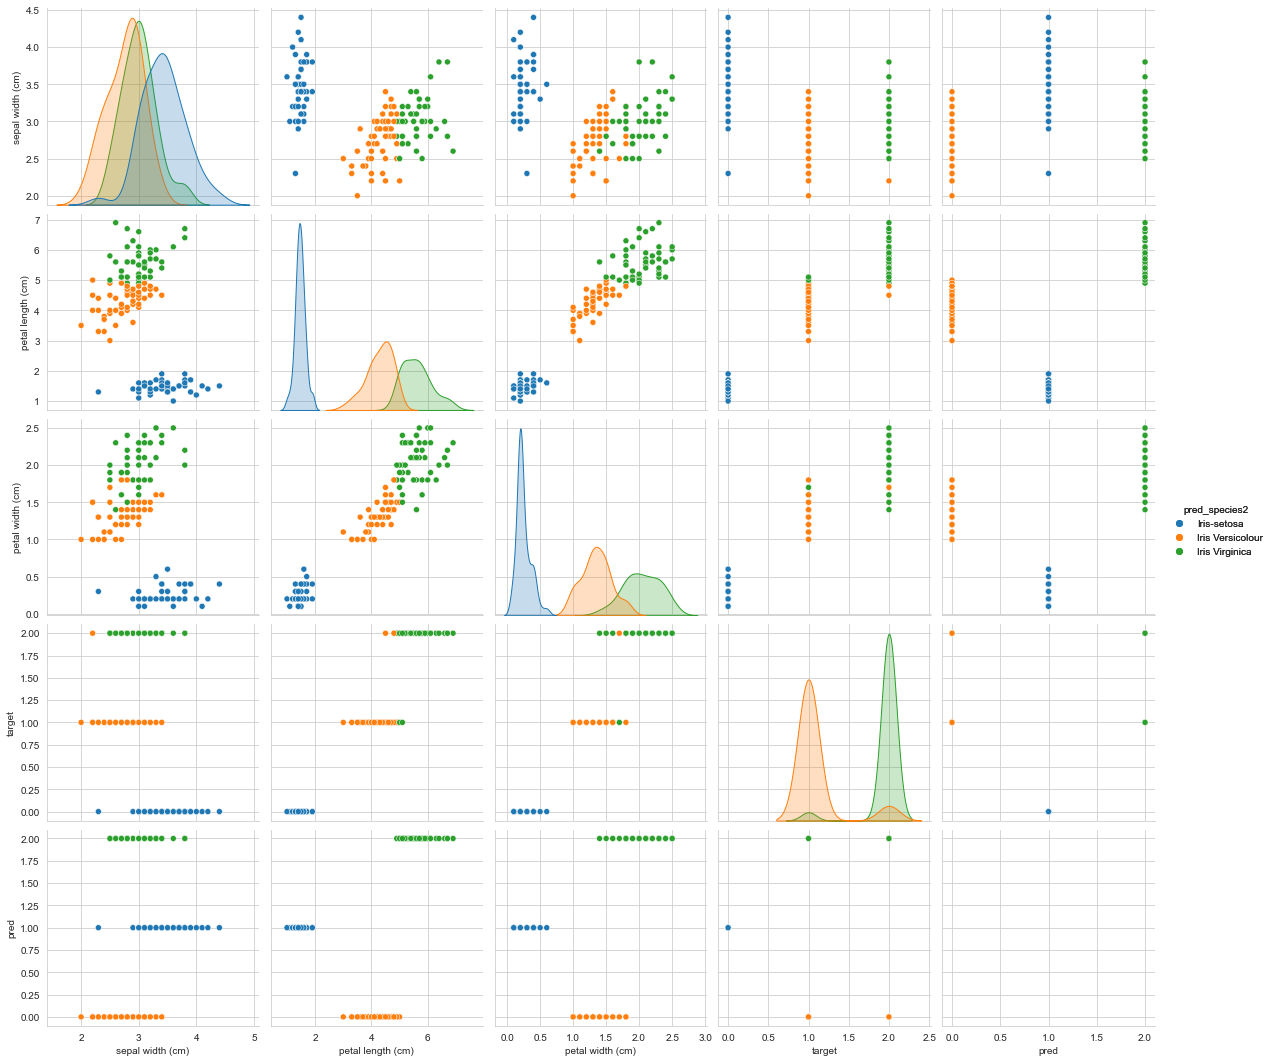

In [58]:
Target=df[['sepal width (cm)','petal length (cm)','petal width (cm)','target','species',
           'pred','pred_species2']]
sns.set_style("whitegrid")
sns.pairplot(Target, hue="pred_species2", height=3).add_legend()
plt.show()

# 4. Lets consider "petal length" and "petal width"

In [59]:
Input= df[['petal length (cm)','petal width (cm)']]
Input.head()

petal length (cm)  petal width (cm)
0                1.4               0.2
1                1.4               0.2
2                1.3               0.2
3                1.5               0.2
4                1.4               0.2

In [60]:
kmeans = KMeans(n_clusters=3, random_state=2)
pred = kmeans.fit_predict(Input)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [61]:
df['pred']=pred

In [62]:
df.groupby(['target','pred']).count()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
target pred                                                           
0      0                    50                50                 50   
1      1                     2                 2                  2   
       2                    48                48                 48   
2      1                    46                46                 46   
       2                     4                 4                  4   

             petal width (cm)  species  pred_species  pred_species1  \
target pred                                                           
0      0                   50       50            50             50   
1      1                    2        2             2              2   
       2                   48       48            48             48   
2      1                   46       46            46             46   
       2                    4        4             4              4   

             pred_species2  
target pred                 
0      0                50  
1      1                 2  
       2                48  
2      1                46  
       2                 4

In [63]:
df['pred_species3'] = df['pred'].replace(to_replace=[0,2,1], 
                                               value=['Iris-setosa','Iris Versicolour','Iris Virginica'])

In [64]:
accuracy_score(df.species, df.pred_species3, normalize=True)

0.96

## accuracy = 96%

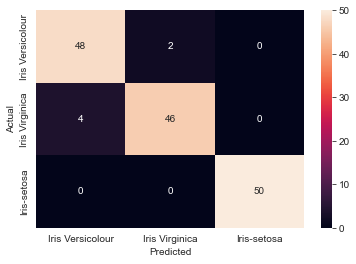

In [65]:
confusion_matrix = pd.crosstab(df['species'], df['pred_species3'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [66]:
kmeans.cluster_centers_

array([[1.462     , 0.246     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

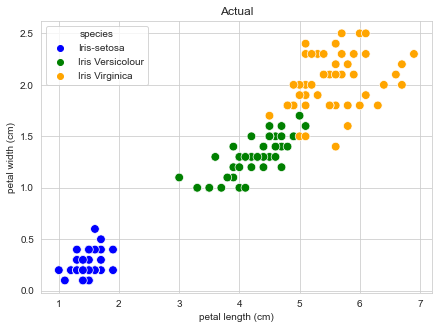

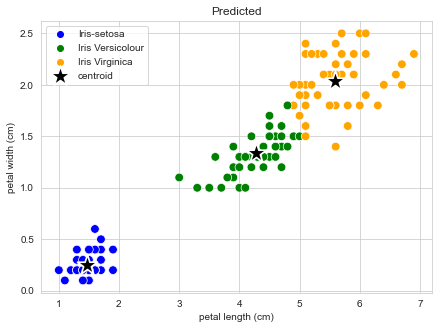

In [67]:
#Actual
plt.figure(figsize=(7,5))
#color=['blue','orange','green']
g=sns.scatterplot(data=df,  x="petal length (cm)", y="petal width (cm)", hue='species', palette=color, s=75)
g.set(title ='Actual')

plt.show()

#Predicted
plt.figure(figsize=(7,5))
#color=['blue','green','orange']
h=sns.scatterplot(data=df, x="petal length (cm)", y="petal width (cm)", hue='pred_species3', palette=color, s=75)
sns.scatterplot(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],
                s=450, color='black',marker='*',label='centroid')
h.set(title ='Predicted')
plt.show()

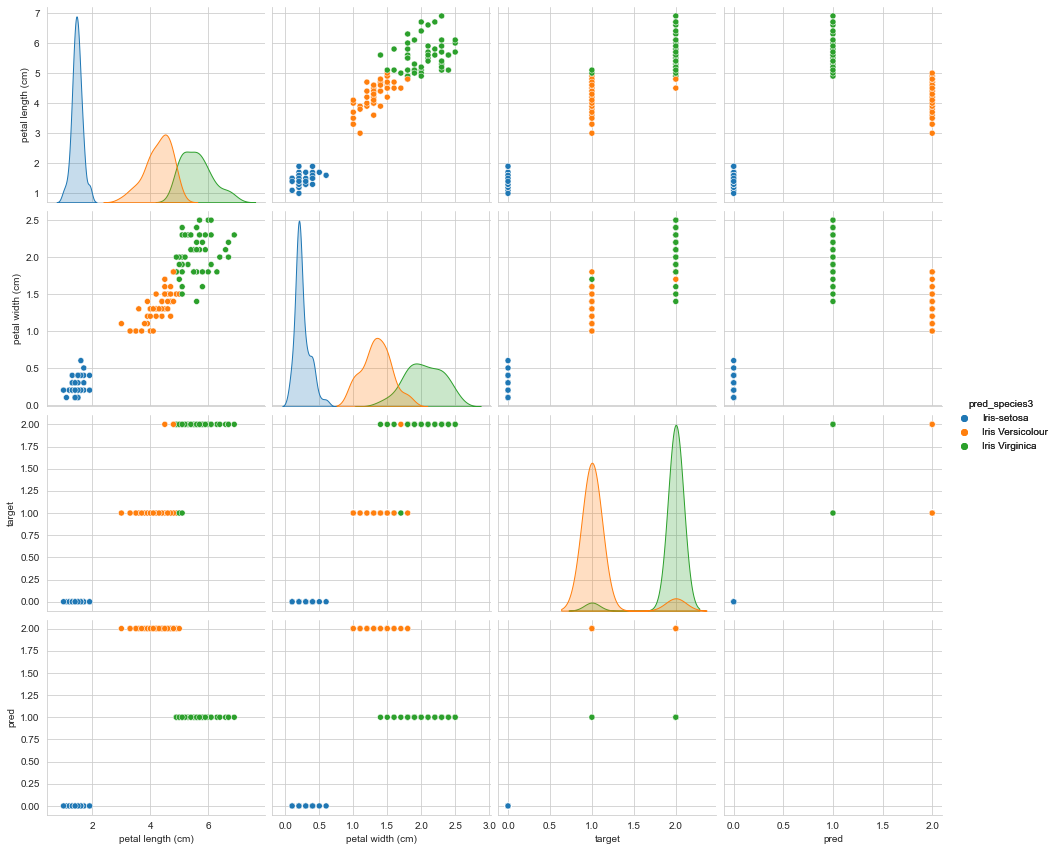

In [68]:
Target=df[["petal length (cm)","petal width (cm)",'target','species',
           'pred', 'pred_species3']]
sns.set_style("whitegrid")
sns.pairplot(Target, hue="pred_species3", height=3).add_legend()
plt.show()

# Preprocessing using min max scaler
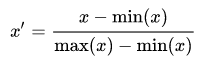

In [69]:
from sklearn.decomposition import NMF
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [70]:
pipe = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('pca',  NMF(n_components=2, init='random', random_state=2)),     
    ('KMeans', KMeans(n_clusters=3, random_state=2)),
])

# Considering all four features

In [71]:
x=df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]

In [72]:
pipe.fit(x)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('pca', NMF(init='random', n_components=2, random_state=2)),
                ('KMeans', KMeans(n_clusters=3, random_state=2))])

In [73]:
df['cluster']=pipe.predict(x)
df.groupby(['target','cluster']).count()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
target cluster                                                           
0      1                       50                50                 50   
1      0                       48                48                 48   
       2                        2                 2                  2   
2      0                       14                14                 14   
       2                       36                36                 36   

                petal width (cm)  species  pred  pred_species  pred_species1  \
target cluster                                                                 
0      1                      50       50    50            50             50   
1      0                      48       48    48            48             48   
       2                       2        2     2             2              2   
2      0                      14       14    14            14             14   
       2                      36       36    36            36             36   

                pred_species2  pred_species3  
target cluster                                
0      1                   50             50  
1      0                   48             48  
       2                    2              2  
2      0                   14             14  
       2                   36             36

In [74]:
df['cluster'] = df['cluster'].replace(to_replace=[1,0,2], 
                                               value=['Iris-setosa','Iris Versicolour','Iris Virginica'])

In [75]:
accuracy_score(df.species,df.cluster,normalize=True)

0.8933333333333333

# accuracy = 89.33%

In [76]:
pipe.predict([[6,2,5,2]])

array([0])

In [77]:
kmeans.predict([[5.1,1.8]])

array([1])

# Let's consider only ['sepal length (cm)','petal length (cm)','petal width (cm)']

In [78]:
x=df[['sepal length (cm)','petal length (cm)','petal width (cm)']]

In [79]:
pipe.fit(x)
df['pred']=pipe.predict(x)
df.groupby(['target','pred']).count()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
target pred                                                           
0      0                    50                50                 50   
1      1                     2                 2                  2   
       2                    48                48                 48   
2      1                    46                46                 46   
       2                     4                 4                  4   

             petal width (cm)  species  pred_species  pred_species1  \
target pred                                                           
0      0                   50       50            50             50   
1      1                    2        2             2              2   
       2                   48       48            48             48   
2      1                   46       46            46             46   
       2                    4        4             4              4   

             pred_species2  pred_species3  cluster  
target pred                                         
0      0                50             50       50  
1      1                 2              2        2  
       2                48             48       48  
2      1                46             46       46  
       2                 4              4        4

In [80]:
df['cluster'] = df['pred'].replace(to_replace=[0,2,1], 
                                               value=['Iris-setosa','Iris Versicolour','Iris Virginica'])
accuracy_score(df.species,df.cluster,normalize=True)

0.96

# accuracy=96%

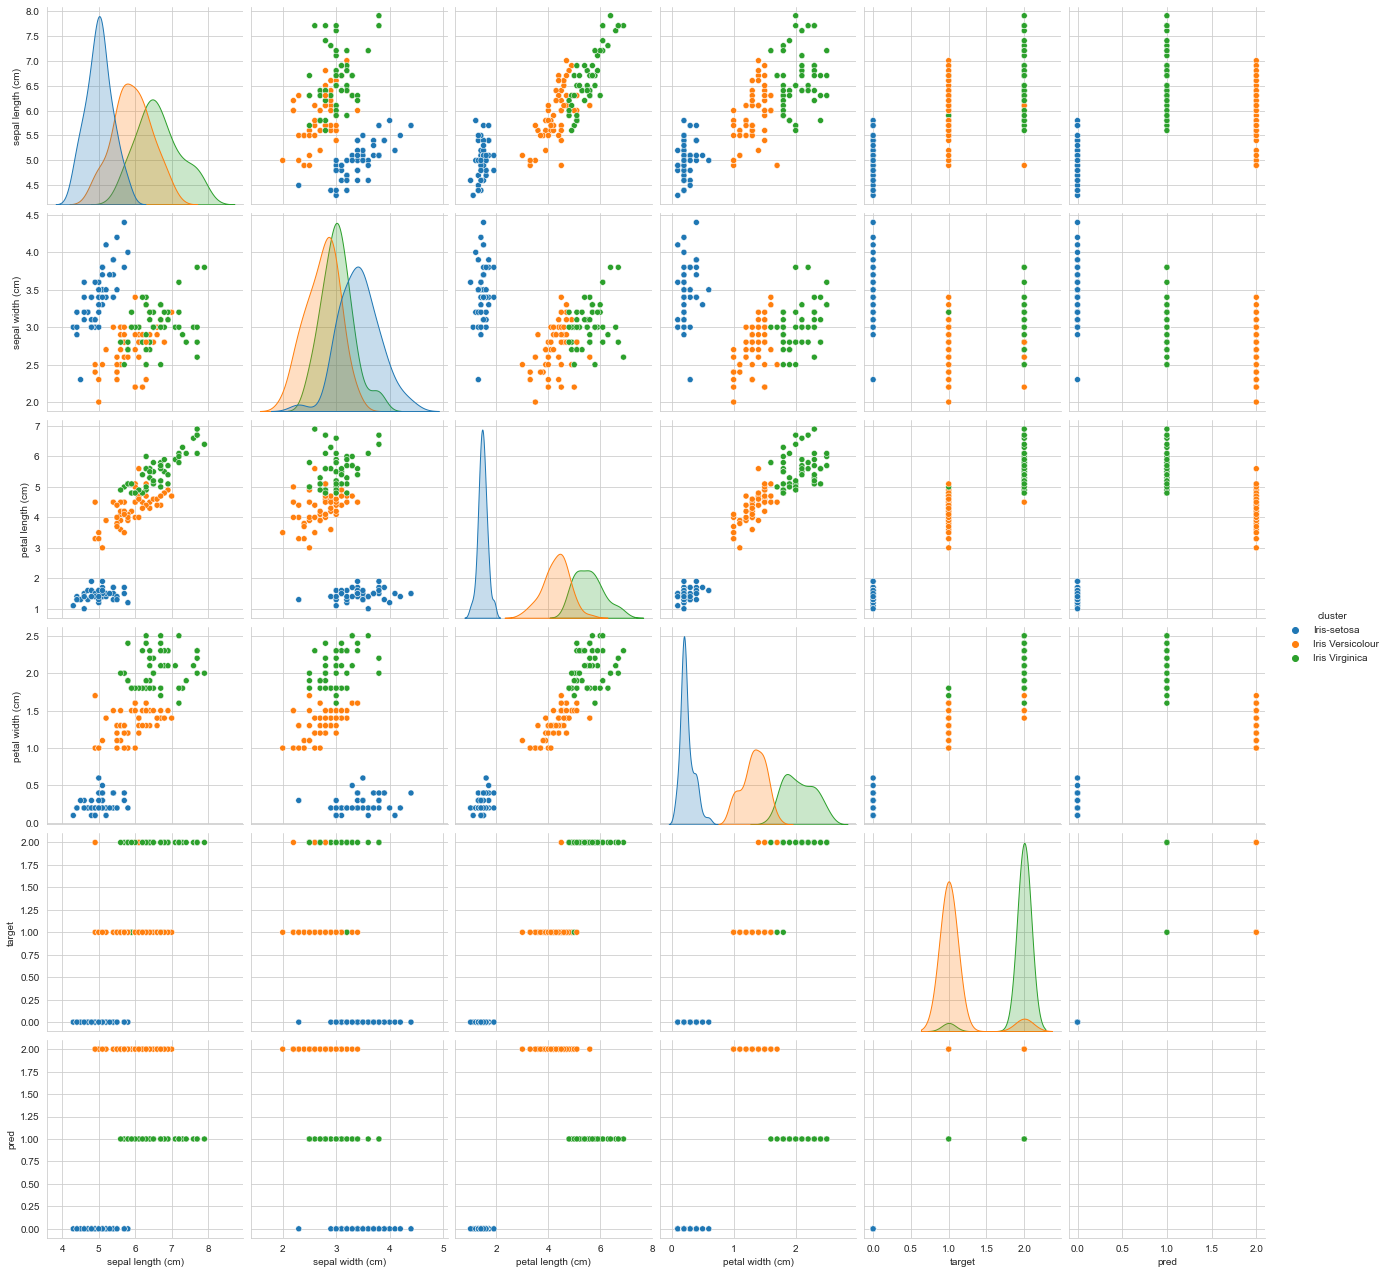

In [81]:
sns.set_style("whitegrid")
sns.pairplot(df, hue="cluster", height=3)
plt.show()

In [82]:
pipe.predict([[6, 5, 2]])

array([1])

# Let's consider only ['sepal width (cm)','petal length (cm)','petal width (cm)']

In [83]:
x=df[['sepal width (cm)','petal length (cm)','petal width (cm)']]

In [84]:
pipe.fit(x)
df['pred']=pipe.predict(x)
df.groupby(['target','pred']).count()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
target pred                                                           
0      0                    50                50                 50   
1      1                     2                 2                  2   
       2                    48                48                 48   
2      1                    46                46                 46   
       2                     4                 4                  4   

             petal width (cm)  species  pred_species  pred_species1  \
target pred                                                           
0      0                   50       50            50             50   
1      1                    2        2             2              2   
       2                   48       48            48             48   
2      1                   46       46            46             46   
       2                    4        4             4              4   

             pred_species2  pred_species3  cluster  
target pred                                         
0      0                50             50       50  
1      1                 2              2        2  
       2                48             48       48  
2      1                46             46       46  
       2                 4              4        4

In [85]:
df['cluster'] = df['pred'].replace(to_replace=[0,1,2], 
                                               value=['Iris-setosa','Iris Versicolour','Iris Virginica'])
accuracy_score(df.species,df.cluster,normalize=True)

0.37333333333333335

# Accuracy =96%

In [86]:
pipe.predict([[6, 5, 2]])

array([1])

# Let's consider only ['petal length (cm)','petal width (cm)']

In [87]:
x=df[['petal length (cm)','petal width (cm)']]

In [88]:
pipe = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    #('pca',  NMF(n_components=2, init='random', random_state=2)),     
    ('KMeans', KMeans(n_clusters=3, random_state=2)),
])

In [89]:
pipe.fit(x)
df['pred']=pipe.predict(x)
df.groupby(['target','pred']).count()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
target pred                                                           
0      0                    50                50                 50   
1      1                    48                48                 48   
       2                     2                 2                  2   
2      1                     4                 4                  4   
       2                    46                46                 46   

             petal width (cm)  species  pred_species  pred_species1  \
target pred                                                           
0      0                   50       50            50             50   
1      1                   48       48            48             48   
       2                    2        2             2              2   
2      1                    4        4             4              4   
       2                   46       46            46             46   

             pred_species2  pred_species3  cluster  
target pred                                         
0      0                50             50       50  
1      1                48             48       48  
       2                 2              2        2  
2      1                 4              4        4  
       2                46             46       46

In [90]:
df['cluster'] = df['pred'].replace(to_replace=[0,1,2], 
                                               value=['Iris-setosa','Iris Versicolour','Iris Virginica'])
accuracy_score(df.species,df.cluster,normalize=True)

0.96

# Accuracy = 96%

In [91]:
pipe.predict([[5,2]])

array([2])

In [92]:
kmeans.predict([[5,2]])

array([1])

Actually for kmeans 1='Iris Virginica', 2= 'Iris Versicolour'and 0='Iris-setosa' while for pipe 2='Iris Virginica', 1= 'Iris Versicolour'and 0='Iris-setosa'
* **Both the predictions are same**

In [93]:
pipe.predict([[3,2]])

array([1])

In [94]:
kmeans.predict([[3,2]])

array([2])

In [95]:
pipe.predict([[2,2]])

array([1])

In [96]:
kmeans.predict([[2,2]])

array([0])

In [97]:
pipe.predict([[1,1]])

array([0])

In [98]:
kmeans.predict([[1,1]])

array([0])

In [99]:
kmeans.cluster_centers_

array([[1.462     , 0.246     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

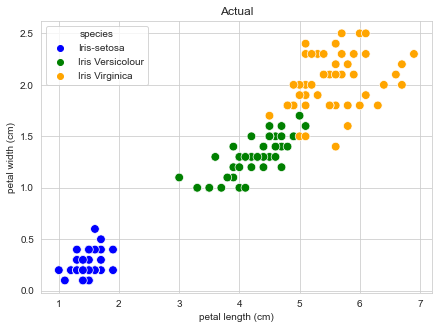

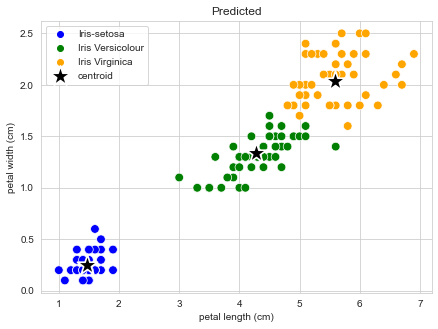

In [100]:
#Actual
plt.figure(figsize=(7,5))
#color=['blue','orange','green']
g=sns.scatterplot(data=df,  x="petal length (cm)", y="petal width (cm)", hue='species', palette=color, s=75)
g.set(title ='Actual')

plt.show()

#Predicted
plt.figure(figsize=(7,5))
#color=['blue','green','orange']
h=sns.scatterplot(data=df, x="petal length (cm)", y="petal width (cm)", hue='cluster', palette=color, s=75)
sns.scatterplot(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],
                s=450, color='black',marker='*',label='centroid')
h.set(title ='Predicted')
plt.show()

# Final Accuracy Score= 96%